This notebook performs PCA and allows you to visualise 2 or 3 components against each other. You have to fit PCA before K-means and some machine learning so this is an important notebook. The functions required for the normalisation of data (i.e magnification and differing image ratios adjustments) are in this notebook as well annotation of the dataset.

To export dataframes to csv you use df.to_csv('[FILENAME.csv]')

You will need to change all the filepaths.

In [2]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.decomposition import PCA
import difflib
#Read measured grains csv 
csv = pd.read_csv(r"C:/Users/pinto/OneDrive - University of Edinburgh/coding/FinalDataset.csv", index_col=0)
measuresDf_FDs = pd.DataFrame(csv)
#Replace erroneous strings in the filenames - You hopefully will not need to do this
measuresDf_RDs = measuresDf_FDs.replace(r'^\s*$',np.nan, regex=True).reset_index(level=0)
measuresDf_RDs.index = measuresDf_RDs['index'].apply(lambda x: x.replace('-','').replace('%2320BCC','').replace('%2320BD','').replace('%2320BD7E','').replace('%2320BD9D','').replace('%2320BE2C','').replace('%2320BE','').replace(' %2320BEB1','').replace('%2320BEBA','').replace('%2320BED8','').replace('%2320BEEE','').replace('%2320BEEF','').replace('%2320BF','').replace('JPG','').replace('%2320C','').replace('%2320C01D','').replace('1','').replace('2','').replace('3','').replace('4','').replace('5','').replace('6','').replace('7','').replace('8','').replace('9','').replace('0','').replace('%',''))
measuresDf_RDs.index.name='image'
area=[]
#I forgot to export img wifth as well so I just made it if height = X, area = Y
for a in measuresDf_RDs['img_h']:
    if a == 972:
        area.append(1259712)
    if a == 912:
        area.append(1108992)
    if a ==450:
        area.append(270000)
measuresDf_RDs['img_area'] = area
measuresDf_RDs

index  img_h  error  Clump  Misread  \
image                                                                     
Abies cephalonica    Abies cephalonica1-1    972      0      0        0   
Abies cephalonica    Abies cephalonica1-1    972      0      0        0   
Abies nordmanniana  Abies nordmanniana1-1    972      0      0        0   
Abies religiosa        Abies religiosa1-1    972      1      0        1   
Abies religiosa        Abies religiosa1-1    972      0      0        0   
...                                   ...    ...    ...    ...      ...   
Zornia curvata          Zornia curvata1-1    972      1      1        0   
Zornia curvata          Zornia curvata1-1    972      1      0        1   
Zornia curvata          Zornia curvata1-1    972      1      0        1   
Zornia piurensis      Zornia piurensis1-2    972      0      0        0   
Zornia piurensis      Zornia piurensis1-3    972      0      0        0   

                      Area    Perimeter  Solidity  Major_axis_length  \
image                                                                  
Abies cephalonica   185475  2148.351514  0.852617         674.933044   
Abies cephalonica   136558  1678.628642  0.899319         538.347768   
Abies nordmanniana  565318  2969.695706  0.991946         946.564642   
Abies religiosa       5115   352.090404  0.863145         117.359585   
Abies religiosa     155620  1725.699710  0.904662         562.851959   
...                    ...          ...       ...                ...   
Zornia curvata       76421  1303.851947  0.904005         367.389517   
Zornia curvata        3779   377.948268  0.714367         129.472859   
Zornia curvata        1517   165.781746  0.913855          57.978301   
Zornia piurensis     60357   989.761543  0.976398         286.656299   
Zornia piurensis     70371  1005.702669  0.995234         346.262154   

                    Minor_axis_length  ...    Extent     Contrast  \
image                                  ...                          
Abies cephalonica          420.156991  ...  0.655936    62.006949   
Abies cephalonica          359.666465  ...  0.684501    51.136255   
Abies nordmanniana         767.424770  ...  0.842792    35.967321   
Abies religiosa             59.842103  ...  0.626838   590.231175   
Abies religiosa            383.508423  ...  0.646937    48.764527   
...                               ...  ...       ...          ...   
Zornia curvata             281.161273  ...  0.663861   212.867950   
Zornia curvata              47.747114  ...  0.457728   876.628321   
Zornia curvata              36.321790  ...  0.633668  1628.025744   
Zornia piurensis           269.424926  ...  0.756486   250.865885   
Zornia piurensis           258.847769  ...  0.761476   278.305838   

                    Dissimilarity  Homogeneity       ASM    Energy  \
image                                                                
Abies cephalonica        1.748401     0.654054  0.115128  0.339303   
Abies cephalonica        1.856435     0.614147  0.097445  0.312159   
Abies nordmanniana       1.892064     0.545196  0.025473  0.159598   
Abies religiosa          6.415186     0.505521  0.123292  0.351071   
Abies religiosa          2.580908     0.566603  0.120440  0.347042   
...                           ...          ...       ...       ...   
Zornia curvata           2.973264     0.613235  0.108983  0.330122   
Zornia curvata           7.342396     0.612201  0.272806  0.522279   
Zornia curvata           9.486856     0.599836  0.111159  0.333257   
Zornia piurensis         3.179826     0.555621  0.056511  0.237711   
Zornia piurensis         3.608922     0.484351  0.054746  0.233972   

                    Correlation            Bounding_box   Entropy img_area  
image                                                                       
Abies cephalonica      0.963486    (56, 763, 690, 1209)  4.849428  1259712  
Abies cephalonica      0.980137    (339, 372, 864, 752)  5.172168  1259712  
Abies 

In [3]:
#Import the PalDat descriptions database
csv = pd.read_csv('PaldatNormalisedFinal.csv',index_col=0)
paldat = pd.DataFrame(csv)
paldat.index.name = 'image'
paldat

genus       species min_max_size  \
image                                                               
Abelia grandiflora              Abelia   grandiflora       36,100   
Abeliophyllum distichum  Abeliophyllum     distichum        26,50   
Abies cephalonica                Abies   cephalonica      101,101   
Abies concolor                   Abies      concolor       51,100   
Abies nordmanniana               Abies  nordmanniana       51,101   
...                                ...           ...          ...   
Zilla spinosa                    Zilla       spinosa        21,25   
Zingiber officinale           Zingiber    officinale       51,101   
Zizania aquatica               Zizania      aquatica        26,50   
Ziziphus jujuba               Ziziphus        jujuba        10,25   
Zomicarpa riedeliana         Zomicarpa    riedeliana        26,50   

                        dispersal_unit       class_1 class_2     polarity  \
image                                                                       
Abelia grandiflora               monad       colpate       -     isopolar   
Abeliophyllum distichum          monad     colporate       -     isopolar   
Abies cephalonica                monad       saccate       -  heteropolar   
Abies concolor                   monad       saccate       -  heteropolar   
Abies nordmanniana               monad       saccate       -  heteropolar   
...                                ...           ...     ...          ...   
Zilla spinosa                    monad       colpate       -     isopolar   
Zingiber officinale              monad  inaperturate       -            -   
Zizania aquatica                 monad      ulcerate       -  heteropolar   
Ziziphus jujuba                  monad     colporate       -     isopolar   
Zomicarpa riedeliana             monad  inaperturate       -            -   

                                  P/E    2D_shape    3D_shape  ...  \
image                                                          ...   
Abelia grandiflora            prolate  triangular           -  ...   
Abeliophyllum distichum             -    circular  spheroidal  ...   
Abies cephalonica              oblate           -           -  ...   
Abies concolor                      -    elliptic   bisaccate  ...   
Abies nordmanniana             oblate           -           -  ...   
...                               ...         ...         ...  ...   
Zilla spinosa            isodiametric    circular  spheroidal  ...   
Zingiber officinale      isodiametric           -  spheroidal  ...   
Zizania aquatica                    -    circular  spheroidal  ...   
Ziziphus jujuba                oblate  triangular           -  ...   
Zomicarpa riedeliana                -    circular  spheroidal  ...   

                        ornamentation_1 ornamentation_2 ornamentation_3  \
image                                                                     
Abelia grandiflora             echinate               -               -   
Abeliophyllum distichum      reticulate               -               -   
Abies cephalonica               psilate       perforate       verrucate   
Abies concolor                perforate         psilate               -   
Abies nordmanniana             scabrate       verrucate         gemmate   
...                                 ...             ...             ...   
Zilla spinosa                reticulate               -               -   
Zingiber officinale            areolate               -               -   
Zizania aquatica                      -               -               -   
Ziziphus jujuba                rugulate               -               -   
Zomicarpa riedeliana           echinate               -               -   

                        ornamentation_4 ornamentation_5 ornamentation_6  \
image                                                                     
Abelia grandiflora                    -               -               -   
Abeliophyllum distich

In [4]:
#Shows all rows of dataframes
pd.set_option('display.max_rows', None)
#Import um sizes for SAPS database
sizes = pd.read_csv(r"C:\Users\pinto\OneDrive - University of Edinburgh\coding\SAPS\SAPSsizes.csv")
sizesdf = pd.DataFrame(sizes)
sizesdf['image']=sizesdf['image'].apply(lambda x: x.replace("'",'').replace('0','').replace('1','').replace('2','').replace('3',''))
sizesdf

image  size
0              Abies nordmanniana   100
1               Abutilon ochsenii    48
2               Acacia pravissima    45
3                  Acer campestre    25
4                   Acer palmatum    23
5            Achillea millefolium    23
6               Acroclinum roseum    25
7             Actinidia kolomikta    20
8             Aeonium holochrysum    20
9                Aeonium lindleyi    20
10         Aeschynanthus tricolor    15
11           Aesculus californica    23
12                Aesculus carnea    30
13                Aesculus glabra    23
14          Aesculus hippocastrum    20
15                Aesculus indica    23
16            Aesculus parviflora    28
17           Agapanthus praecox v    50
18                Agave tequilana    90
19            Agrimonia eupatoria    23
20             Albuca canadiensis   100
21                    Alcea rosea   110
22              Alliana petiolata    33
23            Allium ampetoprasum    35
24                    Allium cepa    28
25            Allium karataviense    30
26    Allium paradoxum v. normale    30
27                  Allium roseum    50
28         Alloplectus mummularia    30
29                Alnus glutinosa    25
30                  Alnus viridis    23
31                 Aloe bellatula    33
32              Alyogyne huegelii    58
33               Alyssum saxatile    16
34           Amaryllis belladonna    88
35          Amelanchier lamarckii    33
36              Amorpha friticosa    23
37             Anagallis arvensis    23
38      Anemone coronaria De Caen    26
39             Anemone hupehensis    18
40               Anemone nemorosa    25
41       Anemopaegma chamberleyii    58
42             Anigozanthos rufus    69
43             Anthericum liliago    50
44          Anthriscus sylvestris    28
45             Aquilegia fragrans    25
46             Aquilegia vulgaris    18
47               Arabis caucasica    25
48              Arctotis fastuosa    25
49              Ardisia solanacea    18
50              Areca rheophytica    25
51          Aristotelia chilensis    15
52               Armeria maritima    65
53            Armoracia rusticana    28
54                Aruncus dioicus    72
55             Asperula sintensis    20
56              Aster tongolensis    28
57                Astrantia major    55
58         Astrophytum capricorne    70
59       Astrophytum coahuilensis    60
60        Astrophytum myriostigma    55
61            Astrophytum ornatum    65
62             Atropha belladonna    38
63             Aubretia deltoides    25
64             Averrhoe carambola    80
65           Aylostera albiflora9    60
66          Begonia convolvolacea    13
67              Bellevalia romana    58
68                Bellis perennis    20
69      Bergenia bressingham ruby    25
70              Bergenia emiensis    30
71          Bergenia purpurascens    23
72         Beschorneria yuccoides    70
73           Betula albo-sinensis    28
74             Betula medwediewii    23
75                 Betula pendula    28
76              Betula schonidtii    23
77                  Betula utilis    28
78           Billbergia distachia    45
79                 Bomaria edulis    63
80          Bongardia chrysogonum    40
81             Borago officinalis    33
82            Bouganvillia glabra    30
83               Boweia volubilis    63
84              Brassica oleracea    20
85                   Briza minima    43
86          Broussonetia kazinoki    30
87           Brunfelsia americana    43
88             Bulbine frutescens    30
89            Burchellia bubalina    28
90     Calliandria haematocephala   170
91            Callistema citrinus    18
92               Calluna vulgaris    15
93           Calochortus superbus    58
94        Calothalmus quadrifidus    15
95              Camassia cusickii    55
96           Camassia leichtlinii    55
97              Camellia japonica    45
98              Camellia sinensis    45
99             Campanula pun

In [5]:
#Number of measured grains in dataset
measuresDf_RDs[measuresDf_RDs['Area'].notnull()]['Area'].size

9847

In [6]:
measuresDf_RDs['index']=measuresDf_RDs.index
#'Closest matching' between measure particles dataset and PalDat, which provides a tolerance for typos and differential spelling, which is common
def function(x):
    try: 
        return difflib.get_close_matches(x, paldat.index,n=1,cutoff=0.9)[0]
    except IndexError:
        return np.nan
measuresDf_RDs['key'] = measuresDf_RDs.index.map(lambda x: function(x))
#Matches are annotated with morphological descriptors
mergedDf = pd.DataFrame.merge(measuresDf_RDs,paldat, how='left', left_on='key', right_on='image')
mergedDf = mergedDf.merge(sizesdf, how='left',left_on='index',right_on='image')
#This function returns the mean size for grains where the sizes were not defined on SAPS, so are gathered from a range (min-ma size) from PalDat
def paldat_size(x):
    if type(x['min_max_size'])==str and x['size'] not in range(200):
        a = x['min_max_size'].split(',')
        b = (int(a[1])-int(a[0]))/2
        a = int(a[0])+b
        x['size'] = a
        return x
    else:
        return x
mergedDf = mergedDf.apply(lambda x: paldat_size(x),axis=1)

In [7]:
mergedDf = mergedDf[mergedDf['Area'].notna()]
mergedDf['ratio'] = 450/mergedDf['img_h']
pd.set_option('display.max_columns', 1500)
pd.set_option('display.max_rows', 1700)
#Multiply all major axis values by magnification factors
mergedDf['x40']=mergedDf['Major_axis_length']*(mergedDf['ratio']*2.586635)
mergedDf['x40SD']=mergedDf['Major_axis_length']*(mergedDf['ratio']*0.371608)
mergedDf['x100']=mergedDf['Major_axis_length']*(mergedDf['ratio']*0.618781)
mergedDf['x100SD']=mergedDf['Major_axis_length']*(mergedDf['ratio']*0.282867)
#If factored values are within 2 SD of values in um, append the magnification to a series
yes=[]
for a,b in mergedDf.iterrows():
    
    ahigh=b['x40']+(2*b['x40SD'])
    alow=b['x40']-(2*b['x40SD'])
    
    bhigh=b['x100']+(2*b['x100SD'])
    blow=b['x100']-(2*b['x100SD'])        
    if b['size'] == 101.0:
        if 210 > b['x40'] > 90:
            yes.append('40x')
        elif 210 > b['x100'] > 90:
            yes.append('100x')
        else:
            yes.append('100x')
    elif ahigh > b['size'] > alow and bhigh >  b['size'] > blow:
        yes.append('either')
    elif ahigh >  b['size'] > alow:
        yes.append('40x')
    elif bhigh >  b['size'] > blow:
        yes.append('100x')
    else:
        yes.append('unknown')
mergedDf['magnification']=pd.Series(yes, index=mergedDf.index)
#Multiply all geometric features by the appropriate maginification factor and add to dataframe
Area = []
Perimeter = []
Major_axis_length = []
Minor_axis_length = []
Equivalent_diameter = []

for a,b in mergedDf.iterrows():
    if b['magnification'] == '40x':
        Area.append(b['Area']*(b['ratio']*2.586635))
        Perimeter.append(b['Perimeter']*(b['ratio']*2.586635))
        Major_axis_length.append(b['Major_axis_length']*(b['ratio']*2.586635))
        Minor_axis_length.append(b['Minor_axis_length']*(b['ratio']*2.586635))
        Equivalent_diameter.append(b['Equivalent_diameter']*(b['ratio']*2.586635))
    elif b['magnification'] == '100x':
        Area.append(b['Area']*(b['ratio']*0.618781))
        Perimeter.append(b['Perimeter']*(b['ratio']*0.618781))
        Major_axis_length.append(b['Major_axis_length']*(b['ratio']*0.618781))
        Minor_axis_length.append(b['Minor_axis_length']*(b['ratio']*0.618781))
        Equivalent_diameter.append(b['Equivalent_diameter']*(b['ratio']*0.618781))
    elif b['magnification'] == 'unknown':
        Area.append(b['Area'])
        Perimeter.append(b['Perimeter'])
        Major_axis_length.append(b['Major_axis_length'])
        Minor_axis_length.append(b['Minor_axis_length'])
        Equivalent_diameter.append(b['Equivalent_diameter'])
mergedDf = mergedDf.drop(['Area','Perimeter','Major_axis_length','Minor_axis_length','Equivalent_diameter'],axis=1)
mergedDf['Area']=pd.Series(Area,index=mergedDf.index)
mergedDf['Perimeter']=pd.Series(Perimeter,index=mergedDf.index)
mergedDf['Major_axis_length']=pd.Series(Major_axis_length,index=mergedDf.index)
mergedDf['Minor_axis_length']=pd.Series(Minor_axis_length,index=mergedDf.index)
mergedDf['Equivalent_diameter']=pd.Series(Equivalent_diameter,index=mergedDf.index)
mergedDf


index  img_h  error  Clump  Misread  Solidity  \
0      Abies cephalonica    972      0      0        0  0.852617   
1      Abies cephalonica    972      0      0        0  0.899319   
2     Abies nordmanniana    972      0      0        0  0.991946   
3        Abies religiosa    972      1      0        1  0.863145   
4        Abies religiosa    972      0      0        0  0.904662   
...                  ...    ...    ...    ...      ...       ...   
9842      Zornia curvata    972      1      1        0  0.904005   
9843      Zornia curvata    972      1      0        1  0.714367   
9844      Zornia curvata    972      1      0        1  0.913855   
9845    Zornia piurensis    972      0      0        0  0.976398   
9846    Zornia piurensis    972      0      0        0  0.995234   

      Eccentricity    Extent     Contrast  Dissimilarity  Homogeneity  \
0         0.782607  0.655936    62.006949       1.748401     0.654054   
1         0.744078  0.684501    51.136255       1.856435     0.614147   
2         0.585396  0.842792    35.967321       1.892064     0.545196   
3         0.860231  0.626838   590.231175       6.415186     0.505521   
4         0.731942  0.646937    48.764527       2.580908     0.566603   
...            ...       ...          ...            ...          ...   
9842      0.643680  0.663861   212.867950       2.973264     0.613235   
9843      0.929516  0.457728   876.628321       7.342396     0.612201   
9844      0.779444  0.633668  1628.025744       9.486856     0.599836   
9845      0.341482  0.756486   250.865885       3.179826     0.555621   
9846      0.664207  0.761476   278.305838       3.608922     0.484351   

           ASM    Energy  Correlation            Bounding_box   Entropy  \
0     0.115128  0.339303     0.963486    (56, 763, 690, 1209)  4.849428   
1     0.097445  0.312159     0.980137    (339, 372, 864, 752)  5.172168   
2     0.025473  0.159598     0.983691   (145, 157, 887, 1061)  5.953881   
3     0.123292  0.351071     0.917417     (34, 547, 154, 615)  5.272603   
4     0.120440  0.347042     0.989556    (228, 267, 771, 710)  5.349896   
...        ...       ...          ...                     ...       ...   
9842  0.108983  0.330122     0.955168    (229, 494, 547, 856)  5.222733   
9843  0.272806  0.522279     0.930787    (789, 549, 918, 613)  3.910655   
9844  0.111159  0.333257     0.898527  (813, 1139, 855, 1196)  4.391925   
9845  0.056511  0.237711     0.927109    (350, 467, 637, 745)  5.678020   
9846  0.054746  0.233972     0.964133    (448, 421, 735, 743)  5.741068   

      img_area                 key  genus       species min_max_size  \
0      1259712   Abies cephalonica  Abies   cephalonica      101,101   
1      1259712   Abies cephalonica  Abies   cephalonica      101,101   
2      1259712  Abies nordmanniana  Abies  nordmanniana       51,101   
3      1259712                 NaN    NaN           NaN          NaN   
4      1259712                 NaN    NaN           NaN          NaN   
...        ...                 ...    ...           ...          ...   
9842   1259712                 NaN    NaN           NaN          NaN   
9843   1259712                 NaN    NaN           NaN          NaN   
9844   1259712                 NaN    NaN           NaN          NaN   
9845   1259712                 NaN    NaN           NaN          NaN   
9846   1259712                 NaN    NaN           NaN          NaN   

     dispersal_unit  class_1 class_2     polarity     P/E 2D_shape 3D_shape  \
0             monad  saccate       -  heteropolar  oblate        -        -   
1             monad  saccate       -  heteropolar  oblate        -        -   
2             monad  saccate       -  heteropolar  oblate        -        -   
3               NaN      NaN     NaN          NaN     NaN      NaN      NaN   
4               NaN      NaN     NaN          NaN     NaN      NaN      NaN   
...             ...      ...     ...          ...     ...      ...      ...   
9842  

In [10]:
#I classified errors as clumps (clusters of grains) and misreads (Internal features and noise as grain detections)
#This creates a series (column) where if either clumps of misreads are true, then so is errors
series = []
for a,b in zip(mergedDf['Clump'],mergedDf['Misread']):
    if a or b == np.int(1):
        series.append(1)
    else:
        series.append(0)
mergedDf['error'] = series

In [11]:
#Merging of values from segmentation and descriptions
measdf = mergedDf.drop(['x40','x40SD','x100','x100SD','ratio','key','img_h'],axis=1).set_index('index')#[['Area','Perimeter','Major_axis_length','Minor_axis_length','Equivalent_diameter','Eccentricity','Extent','Contrast','Dissimilarity','Homogeneity','ASM','Energy','Correlation']]
pd.set_option('display.max_columns', 1500)
measuresDf_RDs_atd=measdf
measuresDf_RDs_atd

error  Clump  Misread  Solidity  Eccentricity    Extent  \
index                                                                         
Abies cephalonica       0      0        0  0.852617      0.782607  0.655936   
Abies cephalonica       0      0        0  0.899319      0.744078  0.684501   
Abies nordmanniana      0      0        0  0.991946      0.585396  0.842792   
Abies religiosa         1      0        1  0.863145      0.860231  0.626838   
Abies religiosa         0      0        0  0.904662      0.731942  0.646937   
...                   ...    ...      ...       ...           ...       ...   
Zornia curvata          1      1        0  0.904005      0.643680  0.663861   
Zornia curvata          1      0        1  0.714367      0.929516  0.457728   
Zornia curvata          1      0        1  0.913855      0.779444  0.633668   
Zornia piurensis        0      0        0  0.976398      0.341482  0.756486   
Zornia piurensis        0      0        0  0.995234      0.664207  0.761476   

                       Contrast  Dissimilarity  Homogeneity       ASM  \
index                                                                   
Abies cephalonica     62.006949       1.748401     0.654054  0.115128   
Abies cephalonica     51.136255       1.856435     0.614147  0.097445   
Abies nordmanniana    35.967321       1.892064     0.545196  0.025473   
Abies religiosa      590.231175       6.415186     0.505521  0.123292   
Abies religiosa       48.764527       2.580908     0.566603  0.120440   
...                         ...            ...          ...       ...   
Zornia curvata       212.867950       2.973264     0.613235  0.108983   
Zornia curvata       876.628321       7.342396     0.612201  0.272806   
Zornia curvata      1628.025744       9.486856     0.599836  0.111159   
Zornia piurensis     250.865885       3.179826     0.555621  0.056511   
Zornia piurensis     278.305838       3.608922     0.484351  0.054746   

                      Energy  Correlation            Bounding_box   Entropy  \
index                                                                         
Abies cephalonica   0.339303     0.963486    (56, 763, 690, 1209)  4.849428   
Abies cephalonica   0.312159     0.980137    (339, 372, 864, 752)  5.172168   
Abies nordmanniana  0.159598     0.983691   (145, 157, 887, 1061)  5.953881   
Abies religiosa     0.351071     0.917417     (34, 547, 154, 615)  5.272603   
Abies religiosa     0.347042     0.989556    (228, 267, 771, 710)  5.349896   
...                      ...          ...                     ...       ...   
Zornia curvata      0.330122     0.955168    (229, 494, 547, 856)  5.222733   
Zornia curvata      0.522279     0.930787    (789, 549, 918, 613)  3.910655   
Zornia curvata      0.333257     0.898527  (813, 1139, 855, 1196)  4.391925   
Zornia piurensis    0.237711     0.927109    (350, 467, 637, 745)  5.678020   
Zornia piurensis    0.233972     0.964133    (448, 421, 735, 743)  5.741068   

                    img_area  genus       species min_max_size dispersal_unit  \
index                                                                           
Abies cephalonica    1259712  Abies   cephalonica      101,101          monad   
Abies cephalonica    1259712  Abies   cephalonica      101,101          monad   
Abies nordmanniana   1259712  Abies  nordmanniana       51,101          monad   
Abies religiosa      1259712    NaN           NaN          NaN            NaN   
Abies religiosa      1259712    NaN           NaN          NaN            NaN   
...                      ...    ...           ...          ...            ...   
Zornia curvata       1259712    NaN           NaN          NaN            NaN   
Zornia curvata       1259712    NaN           NaN          NaN            NaN   
Zornia curvata       1259712    NaN           NaN          NaN            NaN   
Zornia piurensis     1259712    NaN           NaN          NaN            NaN   
Zornia piurensis     1259712    NaN       

In [24]:
#Create dataframe of just descriptions and of just values
atdDf = measuresDf_RDs_atd[['error','min_max_size','size','dispersal_unit','class_1','class_2','polarity','P/E','2D_shape','3D_shape','aperture_type','aperture_features_1','aperture_features_2','aperture_features_3','a_prefix_1','a_prefix_2','a_prefix_3','ornamentation_1','ornamentation_2','ornamentation_3','ornamentation_4','ornamentation_5','ornamentation_6','ornamentation_7','viscin','ubisch','phyla','family','order']].reset_index()#.drop('image',axis=1)
measuresDf_RDs_atd_spt = measuresDf_RDs_atd[['Area','Eccentricity','Equivalent_diameter','Extent','Major_axis_length','Minor_axis_length','Perimeter','ASM','Contrast','Correlation','Dissimilarity','Energy','Entropy','Homogeneity','Solidity']]

measuresDf_RDs_atd_spt

Area  Eccentricity  Equivalent_diameter  \
index                                                                  
Abies cephalonica    53133.521285      0.782607           139.213377   
Abies cephalonica    39120.136944      0.744078           119.452942   
Abies nordmanniana  161948.165444      0.585396           243.043877   
Abies religiosa       5115.000000      0.860231            80.700807   
Abies religiosa     155620.000000      0.731942           445.130922   
...                           ...           ...                  ...   
Zornia curvata       76421.000000      0.643680           311.933068   
Zornia curvata        3779.000000      0.929516            69.365497   
Zornia curvata        1517.000000      0.779444            43.948884   
Zornia piurensis     60357.000000      0.341482           277.216376   
Zornia piurensis     70371.000000      0.664207           299.331154   

                      Extent  Major_axis_length  Minor_axis_length  \
index                                                                
Abies cephalonica   0.655936         193.349882         120.363501   
Abies cephalonica   0.684501         154.221931         103.034618   
Abies nordmanniana  0.842792         271.164915         219.846235   
Abies religiosa     0.626838         117.359585          59.842103   
Abies religiosa     0.646937         562.851959         383.508423   
...                      ...                ...                ...   
Zornia curvata      0.663861         367.389517         281.161273   
Zornia curvata      0.457728         129.472859          47.747114   
Zornia curvata      0.633668          57.978301          36.321790   
Zornia piurensis    0.756486         286.656299         269.424926   
Zornia piurensis    0.761476         346.262154         258.847769   

                      Perimeter       ASM     Contrast  Correlation  \
index                                                                 
Abies cephalonica    615.444027  0.115128    62.006949     0.963486   
Abies cephalonica    480.881255  0.097445    51.136255     0.980137   
Abies nordmanniana   850.736703  0.025473    35.967321     0.983691   
Abies religiosa      352.090404  0.123292   590.231175     0.917417   
Abies religiosa     1725.699710  0.120440    48.764527     0.989556   
...                         ...       ...          ...          ...   
Zornia curvata      1303.851947  0.108983   212.867950     0.955168   
Zornia curvata       377.948268  0.272806   876.628321     0.930787   
Zornia curvata       165.781746  0.111159  1628.025744     0.898527   
Zornia piurensis     989.761543  0.056511   250.865885     0.927109   
Zornia piurensis    1005.702669  0.054746   278.305838     0.964133   

                    Dissimilarity    Energy   Entropy  Homogeneity  Solidity  
index                                                                         
Abies cephalonica        1.748401  0.339303  4.849428     0.654054  0.852617  
Abies cephalonica        1.856435  0.312159  5.172168     0.614147  0.899319  
Abies nordmanniana       1.892064  0.159598  5.953881     0.545196  0.991946  
Abies religiosa          6.415186  0.351071  5.272603     0.505521  0.863145  
Abies religiosa          2.580908  0.347042  5.349896     0.566603  0.904662  
...                           ...       ...       ...          ...       ...  
Zornia curvata           2.973264  0.330122  5.222733     0.613235  0.904005  
Zornia curvata           7.342396  0.522279  3.910655     0.612201  0.714367  
Zornia curvata           9.486856  0.333257  4.391925     0.599836  0.913855  
Zornia piurensis         3.179826  0.237711  5.678020     0.555621  0.976398  
Zornia piurensis         3.608922  0.233972  5.741068     0.484351  0.995234  

[9847 rows x 15 columns]

In [25]:
#You have to scale your measures before you perforrm PCA
x = measuresDf_RDs_atd_spt.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns = measuresDf_RDs_atd_spt.columns)
mean = pd.Series(df.mean())
df = df.replace(np.nan, mean, regex=True)
#Create a PCA with 6 components - you can change this depending on the 'explained variance' seen in next cell
pca = PCA(n_components=6)
partdf = df
principalComponents = pca.fit_transform(partdf)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6'])
principalDf

PC1       PC2       PC3       PC4       PC5       PC6
0     0.074884  0.255951 -0.108597 -0.101764 -0.070124  0.162722
1    -0.037541  0.179129 -0.128499 -0.153308 -0.077758  0.159214
2    -0.525444  0.230182 -0.214261  0.002361 -0.024975  0.128487
3     0.155978 -0.036730 -0.163987  0.001698 -0.134664  0.037594
4    -0.152458  0.660501 -0.236379  0.189710 -0.145539 -0.084812
...        ...       ...       ...       ...       ...       ...
9842 -0.127297  0.441720 -0.097165  0.091830 -0.043075  0.003123
9843  0.689467  0.143925  0.057730  0.018518 -0.194654  0.040891
9844  0.217332 -0.143153 -0.026269  0.137036  0.071271  0.201689
9845 -0.474569  0.263064  0.063791  0.061460  0.077032 -0.037032
9846 -0.366848  0.247364 -0.253846  0.086451 -0.051591  0.001048

[9847 rows x 6 columns]

# PCA visualisation

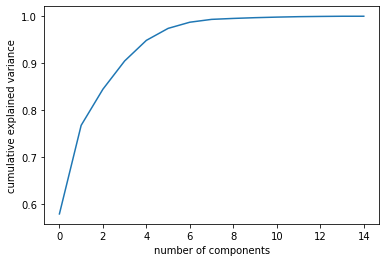

In [26]:
import matplotlib.pyplot as plt
#This graph shows components vs explained variance/ Explained variance means the amount of structure in your data which is represented
#Therefore you whould pick a number of components where the cumulative explained variance = 100%
pca = PCA().fit(partdf)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [27]:
#Define the category and labels you want to observe in 2-component PCA. More labels can be compared in the K-means notebook
a='phyla'
c='Angiospermae'
b='Gymnospermae'

finalDf = principalDf.join(atdDf
finalDf = finalDf[finalDf['error'] == np.int64(0)]
finalDf = finalDf.loc[finalDf[a].isin([b,c])]
finalDf

PC1       PC2       PC3       PC4       PC5       PC6  \
0     0.074884  0.255951 -0.108597 -0.101764 -0.070124  0.162722   
1    -0.037541  0.179129 -0.128499 -0.153308 -0.077758  0.159214   
2    -0.525444  0.230182 -0.214261  0.002361 -0.024975  0.128487   
40   -0.212079 -0.033185 -0.260203 -0.176618 -0.119084  0.074437   
41   -0.160595 -0.029922 -0.249420 -0.160377 -0.111828  0.059768   
42   -0.203842 -0.071338 -0.259189 -0.162969 -0.119688  0.054351   
44   -0.193748  0.015877 -0.103414 -0.174239 -0.007324  0.057424   
52   -0.278899  0.041758  0.187855 -0.199657  0.072416  0.061909   
53   -0.285354  0.069550  0.293195 -0.206757  0.036706  0.021384   
71   -0.449414 -0.162406 -0.146226 -0.152414 -0.161808  0.011114   
72   -0.494897 -0.146925  0.006763 -0.168295 -0.134541 -0.034516   
74   -0.454590 -0.089820  0.026175 -0.197475 -0.112602 -0.011233   
75   -0.498288 -0.141159  0.002491 -0.172552 -0.135917 -0.014912   
77   -0.442296 -0.125878  0.106633 -0.141473 -0.143269 -0.066148   
103  -0.286896  0.037807  0.210373 -0.123398 -0.155473 -0.050725   
123   0.105150  0.024721  0.019301 -0.185754 -0.130727 -0.014746   
126   0.038612 -0.040410 -0.293657 -0.171930 -0.138143  0.042601   
131  -0.212117 -0.292064  0.071006  0.005475 -0.149299 -0.078555   
133  -0.521147 -0.323737  0.143079 -0.066601 -0.134546 -0.103747   
146  -0.104834 -0.123522 -0.245366 -0.152097 -0.156472  0.029528   
147  -0.153632 -0.154905 -0.211722 -0.136605 -0.165122  0.009616   
148   0.196908  0.017157 -0.163169 -0.205377 -0.142211  0.013944   
152  -0.156147 -0.171198 -0.196744 -0.135179 -0.085510  0.016386   
154  -0.080034 -0.158437 -0.218945 -0.134459 -0.117280  0.008208   
156   0.029376 -0.119052 -0.254115 -0.142432 -0.167663 -0.008447   
193  -0.145659 -0.005265  0.252560 -0.097742  0.097675 -0.050672   
195  -0.374111 -0.225093 -0.118330 -0.088438 -0.043219 -0.001122   
198  -0.177078 -0.062656 -0.241952 -0.135335 -0.146770 -0.015058   
199  -0.338690 -0.091638 -0.161647 -0.146848 -0.149312 -0.007582   
201  -0.378631 -0.165505  0.107899 -0.153629 -0.103881 -0.088807   
203  -0.563380 -0.196512  0.157115 -0.149706 -0.125791 -0.110069   
206  -0.522277 -0.250429  0.106807 -0.092203 -0.128866 -0.109802   
207  -0.411507 -0.206302  0.089558 -0.136704 -0.085147 -0.099566   
210  -0.192668  0.021744 -0.175640 -0.105947 -0.145517  0.005898   
242   0.388976  0.157217  0.073601 -0.185098 -0.161808  0.018087   
248  -0.093776  0.053899  0.128975 -0.223161 -0.068067  0.001548   
249  -0.122379 -0.110317 -0.248430 -0.142952  0.003368  0.063021   
250   0.016404  0.027805  0.020813 -0.158945 -0.060669  0.045165   
257  -0.574089  0.173404  0.155000 -0.076780 -0.015469 -0.047987   
281  -0.412418  0.069630  0.204136 -0.217080  0.027617  0.034929   
283  -0.514433 -0.104959  0.157426 -0.172206 -0.090185 -0.023205   
292  -0.029152  0.046957  0.040054 -0.124806  0.090257  0.060397   
295  -0.418467 -0.211723  0.033899 -0.067410  0.061908 -0.000647   
296  -0.153137 -0.254849 -0.105243  0.016383  0.028195 -0.042331   
297   0.305177  0.121360 -0.044234 -0.128363 -0.081014  0.112780   
298  -0.217997 -0.270160 -0.207634 -0.009989 -0.076214  0.055483   
299  -0.093661 -0.264760 -0.213140  0.005776 -0.084529  0.026064   
300  -0.152479 -0.328877 -0.037939  0.097589 -0.069754  0.007082   
301  -0.101599 -0.259518 -0.175356  0.002756 -0.042944  0.056111   
320  -0.032500 -0.116805 -0.211560 -0.141257  0.101772  0.188661   
322  -0.094733 -0.075378 -0.086144 -0.134572  0.202695  0.240164   
323  -0.173318 -0.130528 -0.037612 -0.089259  0.230976  0.186470   
324   0.026152 -0.049822 -0.223989 -0.128511 -0.033209  0.201366   
326  -0.233607 -0.114873 -0.241620 -0.167889 -0.127296  0.093519   
327  -0.035837 -0.018916 -0.257718 -0.210060 -0.093615  0.113676   
328  -0.275357 -0.163571 -0.357097 -0.114975 -0.161365  0.152554   
329  -0.202552 -0.075850 -0.270734 -0.184193 -0.102253  0.147293   
332  -0.009218  0.098951 -0.186075 -0.208688  0.005726  0.183700   

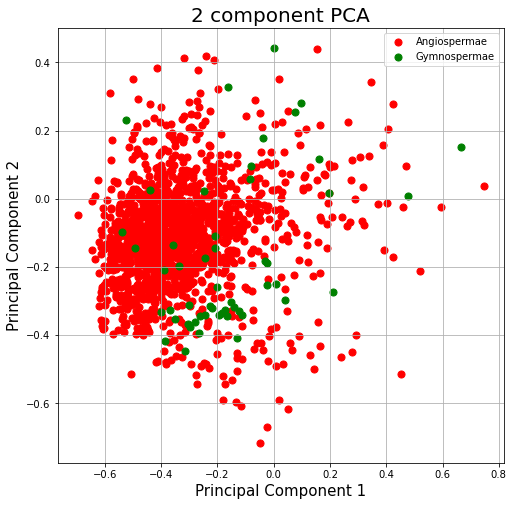

In [28]:
#Visualise 2-component PCA
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [c,b]
colors = ['r', 'g','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[a] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               ,finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [371]:
texture_ft = ['ASM','Contrast','Correlation','Dissimilarity','Energy','Entropy','Homogeneity','Solidity']
geometric_ft = ['Area','Eccentricity','Equivalent_diameter','Extent','Major_axis_length','Minor_axis_length','Perimeter']
all_ft = ['Area','Eccentricity','Equivalent_diameter','Extent','Major_axis_length','Minor_axis_length','Perimeter','ASM','Contrast','Correlation','Dissimilarity','Energy','Entropy','Homogeneity','Solidity']
#Set described features to label and features to include in PCA
descriptive_cat = 'phyla'
set_ft = all_ft
tempordf = measuresDf_RDs_atd
tempordf

img_h  Solidity  Eccentricity    Extent   Entropy    Contrast  \
0       450  0.992010      0.795549  0.750673  6.952962  128.348003   
1       450  0.985933      0.691396  0.747132  6.785752  144.611773   
10      450  0.986306      0.571463  0.793808  6.562724   84.780810   
11      450  0.989525      0.745034  0.726640  7.127174  105.438861   
12      450  0.990935      0.703933  0.748147  7.039169  110.584872   
13      450  0.988803      0.227162  0.764115  6.998555   28.232436   
16      450  0.981548      0.417626  0.796921  6.556284  103.907818   
19      450  0.986618      0.725816  0.763222  6.341960   59.181231   
20      450  0.982017      0.777873  0.712666  6.453545   86.436441   
21      450  0.977778      0.746366  0.721903  6.351516   90.263176   
23      450  0.987737      0.760232  0.735119  6.978188  132.144131   
24      450  0.988500      0.611629  0.768938  7.131748  132.750301   
25      450  0.986792      0.769189  0.697268  6.830845   73.743686   
26      450  0.983939      0.726299  0.677730  6.468073   58.691147   
27      450  0.985276      0.699330  0.688480  6.420133   68.132561   
29      450  0.984909      0.723978  0.799673  6.194228   61.465577   
30      450  0.982614      0.808210  0.736754  5.527088   83.571667   
32      450  0.986044      0.675404  0.762821  5.222546   64.225488   
33      450  0.983355      0.595438  0.783673  5.398395   62.512571   
36      450  0.869253      0.271242  0.629553  6.103928  162.693831   
44      450  0.986953      0.772727  0.750919  6.867123  111.964624   
45      450  0.988061      0.601407  0.809601  6.513832   76.364556   
46      450  0.987727      0.667378  0.773203  6.610632   70.538147   
51      450  0.987654      0.666600  0.737540  7.099563  122.964024   
52      450  0.989581      0.458094  0.782217  6.911221  114.334147   
53      450  0.985315      0.534744  0.772017  7.113922   69.452740   
54      450  0.988791      0.736734  0.764134  6.920223   91.565901   
55      450  0.985466      0.658768  0.780022  6.249050   86.735006   
56      450  0.986740      0.715846  0.752792  6.565185   62.570387   
57      450  0.985994      0.486367  0.785180  6.822927   85.180102   
59      450  0.937951      0.568481  0.673099  6.645924   54.124711   
60      450  0.977053      0.185208  0.751373  6.350513  104.245940   
61      450  0.976065      0.321106  0.740378  6.525900  117.663655   
62      450  0.960674      0.413581  0.745098  6.430069  113.857668   
67      450  0.984310      0.190521  0.774498  6.753664  107.847737   
70      450  0.985570      0.355873  0.773324  6.760880  114.719940   
71      450  0.989827      0.473487  0.779221  6.942811  113.007071   
72      450  0.987395      0.261208  0.771400  6.942189  154.932478   
73      450  0.984911      0.384692  0.782135  6.780309  152.395494   
78      450  0.982370      0.825132  0.760635  6.821313  145.334090   
80      450  0.979462      0.809501  0.778716  6.599842  124.136341   
81      450  0.984487      0.311911  0.790230  6.181862   61.242022   
82      450  0.979820      0.285646  0.782579  6.434376   66.757965   
83      450  0.949896      0.688939  0.697264  6.517386   53.968774   
84      450  0.983645      0.311874  0.793741  6.048028   65.174240   
85      450  0.989653      0.273844  0.813350  6.158226   56.430189   
86      450  0.986644      0.386869  0.786602  6.302072   68.496325   
87      450  0.985048      0.420119  0.768439  6.568418   66.108231   
88      450  0.986128      0.407711  0.786272  6.442804   81.327772   
90      450  0.963631      0.419213  0.779687  6.843888  109.064587   
93      450  0.981682      0.216570  0.777957  6.868689  120.471279   
94      450  0.985061      0.316881  0.784970  6.964263  121.760091   
102     450  0.880359      0.502915  0.712672  6.404472  257.197575   
103     450  0.840201      0.496697  0.606812  6.611460  332.411178   
104     450  0.906766      0.401012  0.753565  6.383956  188.401657   
106     450  0.933915      0.5

In [373]:
#This allows you to visualise each principal component with labels against each other
import plotly.express as px
from sklearn.decomposition import PCA

df = tempordf
features = set_ft

pca = PCA()
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(3),
    color=df[descriptive_cat]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [384]:
#Visualise 3-component PCA in 3D
import plotly.express as px
from sklearn.decomposition import PCA

df = tempordf[tempordf['phyla']!='-']
X = df[all_ft]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df[descriptive_cat],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()